In [ ]:
from main import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Equation type 

In [ ]:
equation_type = str(input())

implicit


Input N > 0 

In [ ]:
N = int(input())

24






Input K > 0 

In [ ]:
K = int(input())

800


Input T > 0

In [ ]:
T = int(input())

18



\begin{align}
\frac {\partial{u}} {\partial{t}} = \frac {\partial ^ 2 {u}} {\partial{x^2}} + 0.5 \cdot exp(-0.5t) \cdot cos(x), \\
U_x(0, t) = exp(-0.5t), \\
U_x(\frac {\pi} {2}, t) = -exp(-0.5t), \\
U(x, 0) = sin(x)
\end{align}

Аналитическое решение:
\begin{align}
U(x, t) = exp(-0.5t) \cdot sin(x)
\end{align}

In [ ]:
params = {
    'l': np.pi,
    'psi':  lambda x: np.sin(x),
    'f':    lambda x, t: 0.5 * np.exp(-0.5 * t) * np.cos(x),
    'phi0': lambda t: np.exp(-0.5 * t),
    'phi1': lambda t: -np.exp(-0.5 * t),
    'solution': lambda x, t: np.exp(-0.5 * t) * np.sin(x),
    'bound_type': 'a1p1',
}

Input type of approximation:
1. 2 point first degree
2. 2 point second degree
3. 3 point second degree

In [ ]:
aprox = int(input())
if (aprox == 1):
    params['bound_type'] = 'a1p1'
elif (aprox == 2):
    params['bound_type'] = 'a1p2'
else:
    params['bound_type'] = 'a1p3'

1


In [ ]:
solver = ParabolicSolver(params, equation_type)

In [ ]:
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }

In [ ]:
print("Sigma: ",solver.sigma)

Sigma:  1.3131225400046977


In [ ]:
def draw(dict_, N, K, T, save_file="plot.png"):
    fig = plt.figure(figsize=plt.figaspect(0.3))
    # Make data
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    x, t = np.meshgrid(x, t)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])

    # Plot the surface.
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plt.title('numerical')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    ax.plot_surface(x, t, z1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=True)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    plt.title('analytic')
    surf = ax.plot_surface(x, t, z2, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)
    # # Customize the z axis
    # ax.set_zlim(-1.01, 1.01)

    # # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=15)

    plt.savefig(save_file)
    plt.show()

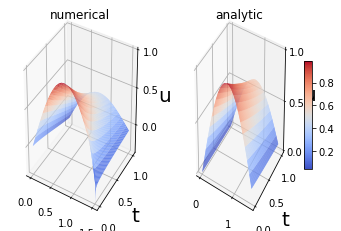

In [ ]:
draw(dict_ans, N, K, T)

In [ ]:
def draw_u_x(dict_, N, K, T, time=0, save_file="plot_u_x.png"):
    fig = plt.figure()
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])
    

    plt.title('U from x')
    plt.plot(x[0:-2], z1[time][0:-2], color='r', label='numerical')
    plt.plot(x[0:-2], z2[time][0:-2], color='b', label='analytic')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.savefig(save_file)
    plt.show()
    
    err = []
    error = compare_error(dict_ans)
    for i in range(len(error)):
        tmp = 0
        for j in error[i]:
            tmp += j
        err.append(tmp/len(error[i])/1000)
    plt.title('Error from t')
    plt.plot(t, err, color='b', label='err')
    plt.legend(loc='best')
    plt.ylabel('Err')
    plt.xlabel('t')
    plt.savefig('err.png')
    plt.show()

In [ ]:
curr_time = int(input())

0


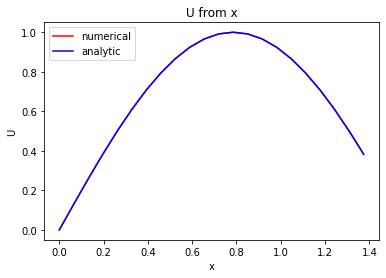

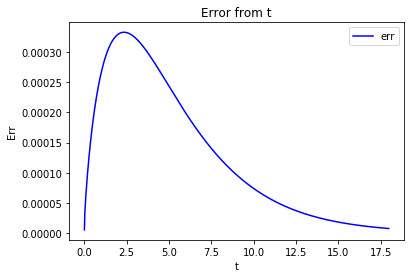

In [ ]:
draw_u_x(dict_ans, N, K, T, curr_time)

In [ ]:
error = compare_error(dict_ans)
avg_err = 0.0
for i in error:
    for j in i:
        avg_err += j
    avg_err /= N

First elements in error array:

In [ ]:
print(error[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.130526192220052]


Middle elements in error array:

In [ ]:
print(error[int(K/2)])

[0.15004323820867924, 0.15003908897981438, 0.14936905048260124, 0.14802353229739648, 0.1459959414158312, 0.14328297214661226, 0.1398848734691995, 0.13580568803885318, 0.1310534574451474, 0.12564038882426248, 0.11958297851440504, 0.11290208911315253, 0.10562297703359104, 0.09777526844980879, 0.08939288235767477, 0.0805139003391925, 0.071180383492943, 0.06143813786389161, 0.05133643055787989, 0.040927659544548405, 0.030266980922935578, 0.019411898133123107, 0.008421818232685858, 0.002642419092700911]


Last elements in error array:

In [ ]:
print(error[-1])

[0.012334146727334022, 0.012334100112082183, 0.012272310337819916, 0.012148946166527067, 0.011964485133377644, 0.0117197139928831, 0.011415727524155636, 0.011053925651563613, 0.010636008848490695, 0.010163971804324615, 0.009640095348056793, 0.009066936635819759, 0.00844731762416014, 0.007784311865663499, 0.007081229678526632, 0.006341601756619593, 0.005569161301297136, 0.00476782477051005, 0.0039416713544368955, 0.003094921299717477, 0.0022319132162416586, 0.001357080511163347, 0.00047492710421674275, 0.00040999741362547854]


In [ ]:
print(f'Average error in each N: {avg_err}')

Average error in each N: 0.008100242309372108


In [ ]:
print(f'Average error\t\t: {avg_err / K}')

Average error		: 1.0125302886715135e-05
